In [1]:
!pip install -q pyibl

In [2]:
from pyibl import Agent
import numpy as np
import random
import pandas as pd
import seaborn as sns
from io import BytesIO
import pickle
import requests
import math
import matplotlib.pyplot as plt
import copy
import warnings
warnings.simplefilter("ignore", UserWarning)

In [3]:
# Note that this is a different email file than the one for Assignment 5.
mLink = 'https://github.com/TylerJamesMalloy/88308/blob/main/Data/emailEmbeddings.pkl?raw=true'
mfile = BytesIO(requests.get(mLink).content)
emails = pickle.load(mfile)
#print(emails['EmailID'].unique())
#print(emails.columns)
"""
Index(['EmailID', 'Type', 'Sender', 'Subject', 'Body', 'Link', 'LinkText',
       'sender_mismatch', 'request_credentials', 'subject_suspecious',
       'urgent', 'offer', 'link_mismatch', 'hi_clust', 'pam_clust',
       'Embedding'],
"""

"\nIndex(['EmailID', 'Type', 'Sender', 'Subject', 'Body', 'Link', 'LinkText',\n       'sender_mismatch', 'request_credentials', 'subject_suspecious',\n       'urgent', 'offer', 'link_mismatch', 'hi_clust', 'pam_clust',\n       'Embedding'],\n"

<Axes: xlabel='Trial', ylabel='Correct'>

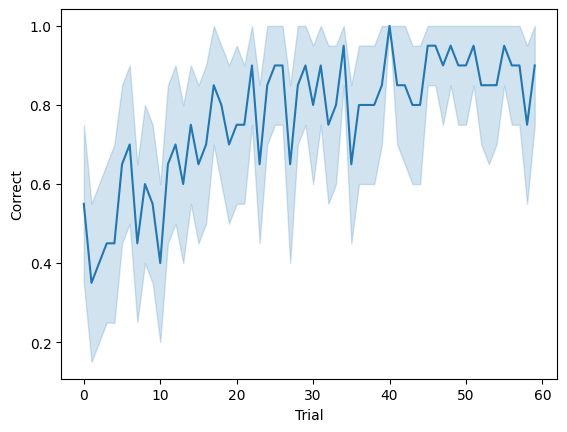

In [4]:
columns = ["Trial", "Correct"]
df = pd.DataFrame([], columns=columns)

phish_indices = np.array(range(1,186))
ham_indices = np.array(range(187,239))
for agentID in range(20):
  agent = Agent(name="Predefined Attributes", attributes=['sender_mismatch',
                                                          'request_credentials',
                                                          'subject_suspecious',
                                                          'urgent',
                                                          'offer',
                                                          'link_mismatch',
                                                          'judgement'],
                default_utility=0.5, mismatch_penalty=1)
  trial_order = np.random.choice(["phishing", "ham"], 60, replace=True)
  # pretrial [ham/phishing] * 5
  # ['ham', 'ham','ham','ham','ham','ham','ham','ham']
  for trial in range(60):
    emailType = trial_order[trial]
    if(emailType == 'ham'):
      emailId = np.random.choice(ham_indices, 1, replace=True)[0]
    else:
      emailId = np.random.choice(phish_indices, 1, replace=True)[0]

    email = emails[emails["EmailID"] == emailId]
    sender_mismatch = email['sender_mismatch'].values[0]
    request_credentials = email['request_credentials'].values[0]
    subject_suspecious = email['subject_suspecious'].values[0]
    urgent = email['urgent'].values[0]
    offer = email['offer'].values[0]
    link_mismatch = email['link_mismatch'].values[0]

    base_email = {'sender_mismatch':sender_mismatch,
                  'request_credentials':request_credentials,
                  'subject_suspecious':subject_suspecious,
                  'urgent':urgent,
                  'offer':offer,
                  'link_mismatch':link_mismatch}
    accept = copy.deepcopy(base_email)
    reject = copy.deepcopy(base_email)
    accept["judgement"] = "ham"
    reject["judgement"] = "phishing"


    agent_choice = agent.choose([accept, reject])
    agent_judgement = agent_choice['judgement']

    correct = 0
    if(agent_judgement == email['Type'].values[0]): correct = 1

    if(trial > 10 and trial < 50):
      agent.respond(correct)
    else:
      agent.respond()

    d = pd.DataFrame([[trial, correct]], columns=columns)
    df = pd.concat([d, df], ignore_index=True)

sns.lineplot(df, x='Trial', y='Correct')


<Axes: xlabel='Trial', ylabel='Correct'>

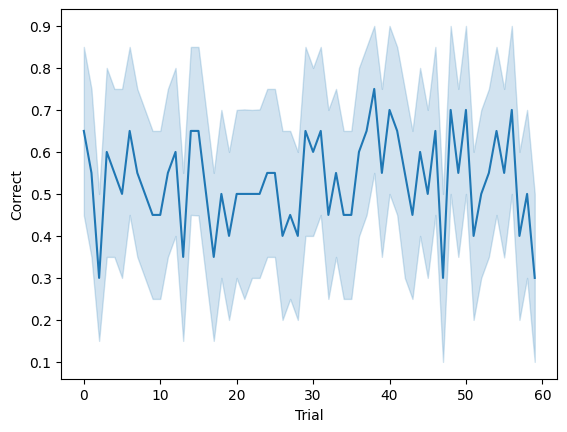

In [5]:
from sklearn.metrics.pairwise import cosine_similarity

columns = ["Trial", "Correct"]
df = pd.DataFrame([], columns=columns)

ham_indices = np.array(range(1,186))
phish_indices = np.array(range(187,239))
for agentID in range(20):
  agent = Agent(name="Embedding Only", attributes=['embedding', 'judgement'],
                default_utility=0.5, mismatch_penalty=1)
  agent.similarity(["embedding"], lambda x, y: cosine_similarity([x,y])[0,1])

  trial_order = np.random.choice(["phishing", "ham"], 60, replace=True) # update
  for trial in range(60):
    emailType = trial_order[trial]
    if(emailType == 'ham'):
      emailId = np.random.choice(ham_indices, 1, replace=True)[0]
    else:
      emailId = np.random.choice(phish_indices, 1, replace=True)[0]

    email = emails[emails["EmailID"] == emailId]
    embedding = tuple(email['Embedding'].item())

    base_email = {'embedding':embedding}
    accept = copy.deepcopy(base_email)
    reject = copy.deepcopy(base_email)
    accept["judgement"] = "ham"
    reject["judgement"] = "phishing"

    agent_choice = agent.choose([accept, reject])
    agent_judgement = agent_choice['judgement']

    correct = 0
    if(agent_judgement == email['Type'].values[0]): correct = 1

    if(trial > 10 and trial < 50):
      agent.respond(correct)
    else:
      agent.respond()

    d = pd.DataFrame([[trial, correct]], columns=columns)
    df = pd.concat([d, df], ignore_index=True)

sns.lineplot(df, x='Trial', y='Correct')

<Axes: xlabel='Trial', ylabel='Correct'>

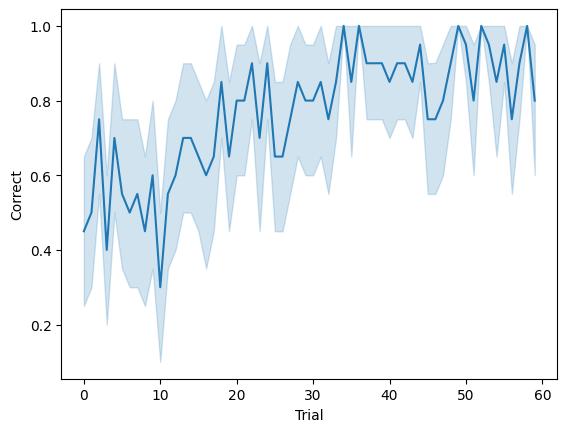

In [6]:
from sklearn.metrics.pairwise import cosine_similarity

columns = ["Trial", "Correct"]
df = pd.DataFrame([], columns=columns)

#[0.3-0.4]<- [0,1]
ham_indices = np.array(range(1,186))
phish_indices = np.array(range(187,239))
for agentID in range(20):
  agent = Agent(name="Embedding and Attributes", attributes=['sender_mismatch',
                                                          'request_credentials',
                                                          'subject_suspecious',
                                                          'urgent',
                                                          'offer',
                                                          'link_mismatch',
                                                          'judgement',
                                                          'embedding'],
                default_utility=0.5, mismatch_penalty=100)
  agent.similarity(["embedding"], lambda x, y: cosine_similarity([x,y])[0,1])

  trial_order = np.random.choice(["phishing", "ham"], 60, replace=True) # update
  for trial in range(60):
    emailType = trial_order[trial]
    if(emailType == 'ham'):
      emailId = np.random.choice(ham_indices, 1, replace=True)[0]
    else:
      emailId = np.random.choice(phish_indices, 1, replace=True)[0]

    email = emails[emails["EmailID"] == emailId]
    sender_mismatch = email['sender_mismatch'].values[0]
    request_credentials = email['request_credentials'].values[0]
    subject_suspecious = email['subject_suspecious'].values[0]
    urgent = email['urgent'].values[0]
    offer = email['offer'].values[0]
    link_mismatch = email['link_mismatch'].values[0]
    embedding = tuple(email['Embedding'].item())

    base_email = {'sender_mismatch':sender_mismatch,
                  'request_credentials':request_credentials,
                  'subject_suspecious':subject_suspecious,
                  'urgent':urgent,
                  'offer':offer,
                  'link_mismatch':link_mismatch,
                  'embedding':embedding}
    accept = copy.deepcopy(base_email)
    reject = copy.deepcopy(base_email)
    accept["judgement"] = "ham"
    reject["judgement"] = "phishing"

    agent_choice = agent.choose([accept, reject])
    agent_judgement = agent_choice['judgement']

    correct = 0
    if(agent_judgement == email['Type'].values[0]): correct = 1

    if(trial > 10 and trial < 50):
      agent.respond(correct)
    else:
      agent.respond()

    d = pd.DataFrame([[trial, correct]], columns=columns)
    df = pd.concat([d, df], ignore_index=True)

sns.lineplot(df, x='Trial', y='Correct')

# Improving pre-Trial Performance

---



<Axes: xlabel='Trial', ylabel='Correct'>

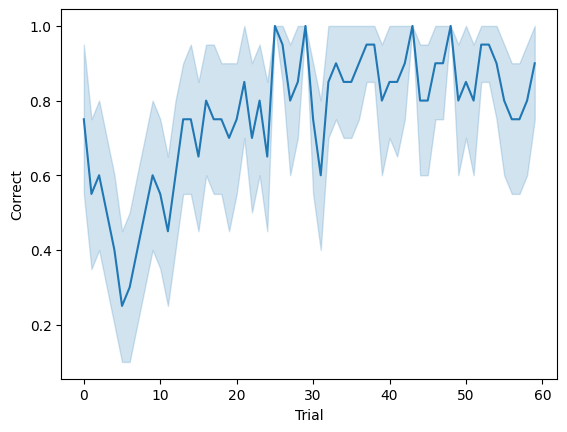

In [7]:
from sklearn.metrics.pairwise import cosine_similarity

mLink = 'https://github.com/TylerJamesMalloy/88308/blob/main/Data/SimulatedData.pkl?raw=true'
mfile = BytesIO(requests.get(mLink).content)
simData = pickle.load(mfile)

columns = ["Trial", "Correct"]
df = pd.DataFrame([], columns=columns)

ham_indices = np.array(range(1,186))
phish_indices = np.array(range(187,239))
for agentID in range(20):
  agent = Agent(name="Embedding and Attributes", attributes=['sender_mismatch',
                                                          'request_credentials',
                                                          'subject_suspecious',
                                                          'urgent',
                                                          'offer',
                                                          'link_mismatch',
                                                          'judgement',
                                                          'embedding'],
                default_utility=0.5, mismatch_penalty=100)
  agent.similarity(["embedding"], lambda x, y: cosine_similarity([x,y])[0,1])

  for index, row in simData.iterrows():
    choice = {  "sender_mismatch":row['sender_mismatch'],
                "request_credentials":row['request_credentials'],
                "subject_suspecious":row['subject_suspecious'],
                "urgent":row['urgent'],
                "offer":row['offer'],
                "link_mismatch":row['link_mismatch'],
                "embedding": tuple(row['embedding']),}
    ham = copy.deepcopy(choice)
    ham["judgement"] = "ham"
    phishing = copy.deepcopy(choice)
    phishing["judgement"] = "phishing"
    choices = [ham,phishing]

    choice = agent.choose(choices)

    correct = 1 if choice['judgement'] == "phishing" else 0

    agent.respond(correct)

  trial_order = np.random.choice(["phishing", "ham"], 60, replace=True) # update
  for trial in range(60):
    emailType = trial_order[trial]
    if(emailType == 'ham'):
      emailId = np.random.choice(ham_indices, 1, replace=True)[0]
    else:
      emailId = np.random.choice(phish_indices, 1, replace=True)[0]

    email = emails[emails["EmailID"] == emailId]
    sender_mismatch = email['sender_mismatch'].values[0]
    request_credentials = email['request_credentials'].values[0]
    subject_suspecious = email['subject_suspecious'].values[0]
    urgent = email['urgent'].values[0]
    offer = email['offer'].values[0]
    link_mismatch = email['link_mismatch'].values[0]
    embedding = tuple(email['Embedding'].item())

    base_email = {'sender_mismatch':sender_mismatch,
                  'request_credentials':request_credentials,
                  'subject_suspecious':subject_suspecious,
                  'urgent':urgent,
                  'offer':offer,
                  'link_mismatch':link_mismatch,
                  'embedding':embedding}
    accept = copy.deepcopy(base_email)
    reject = copy.deepcopy(base_email)
    accept["judgement"] = "ham"
    reject["judgement"] = "phishing"

    agent_choice = agent.choose([accept, reject])
    agent_judgement = agent_choice['judgement']

    correct = 0
    if(agent_judgement == email['Type'].values[0]): correct = 1

    if(trial > 10 and trial < 50):
      agent.respond(correct)
    else:
      agent.respond()

    d = pd.DataFrame([[trial, correct]], columns=columns)
    df = pd.concat([d, df], ignore_index=True)

sns.lineplot(df, x='Trial', y='Correct')

<Axes: xlabel='Trial', ylabel='Correct'>

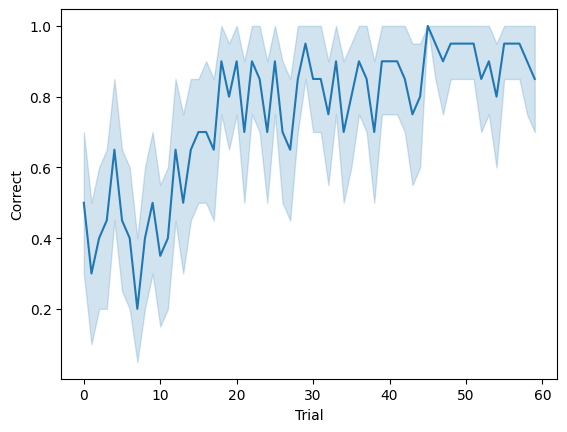

In [8]:
from sklearn.metrics.pairwise import cosine_similarity

mLink = 'https://github.com/TylerJamesMalloy/88308/blob/main/Data/SimulatedData.pkl?raw=true'
mfile = BytesIO(requests.get(mLink).content)
simData = pickle.load(mfile)

columns = ["Trial", "Correct"]
df = pd.DataFrame([], columns=columns)

ham_indices = np.array(range(1,186))
phish_indices = np.array(range(187,239))
for agentID in range(20):
  agent = Agent(name="Embedding and Attributes", attributes=['sender_mismatch',
                                                          'request_credentials',
                                                          'subject_suspecious',
                                                          'urgent',
                                                          'offer',
                                                          'link_mismatch',
                                                          'judgement',
                                                          'embedding'],
                default_utility=0.5, mismatch_penalty=100)
  agent.similarity(["embedding"], lambda x, y: cosine_similarity([x,y])[0,1])

  for index, row in simData.iterrows():
    choice = { "embedding": tuple(row['embedding']),}
    ham = copy.deepcopy(choice)
    ham["judgement"] = "ham"
    phishing = copy.deepcopy(choice)
    phishing["judgement"] = "phishing"
    choices = [ham,phishing]

    choice = agent.choose(choices)

    correct = 1 if choice['judgement'] == "phishing" else 0

    agent.respond(correct)

  trial_order = np.random.choice(["phishing", "ham"], 60, replace=True) # update
  for trial in range(60):
    emailType = trial_order[trial]
    if(emailType == 'ham'):
      emailId = np.random.choice(ham_indices, 1, replace=True)[0]
    else:
      emailId = np.random.choice(phish_indices, 1, replace=True)[0]

    email = emails[emails["EmailID"] == emailId]
    sender_mismatch = email['sender_mismatch'].values[0]
    request_credentials = email['request_credentials'].values[0]
    subject_suspecious = email['subject_suspecious'].values[0]
    urgent = email['urgent'].values[0]
    offer = email['offer'].values[0]
    link_mismatch = email['link_mismatch'].values[0]
    embedding = tuple(email['Embedding'].item())

    base_email = {'sender_mismatch':sender_mismatch,
                  'request_credentials':request_credentials,
                  'subject_suspecious':subject_suspecious,
                  'urgent':urgent,
                  'offer':offer,
                  'link_mismatch':link_mismatch,
                  'embedding':embedding}
    accept = copy.deepcopy(base_email)
    reject = copy.deepcopy(base_email)
    accept["judgement"] = "ham"
    reject["judgement"] = "phishing"

    agent_choice = agent.choose([accept, reject])
    agent_judgement = agent_choice['judgement']

    correct = 0
    if(agent_judgement == email['Type'].values[0]): correct = 1

    if(trial > 10 and trial < 50):
      agent.respond(correct)
    else:
      agent.respond()

    d = pd.DataFrame([[trial, correct]], columns=columns)
    df = pd.concat([d, df], ignore_index=True)

sns.lineplot(df, x='Trial', y='Correct')

# Student and Teacher Simulation (Assignment 5 Question 3)

<Axes: xlabel='Trial', ylabel='Correct'>

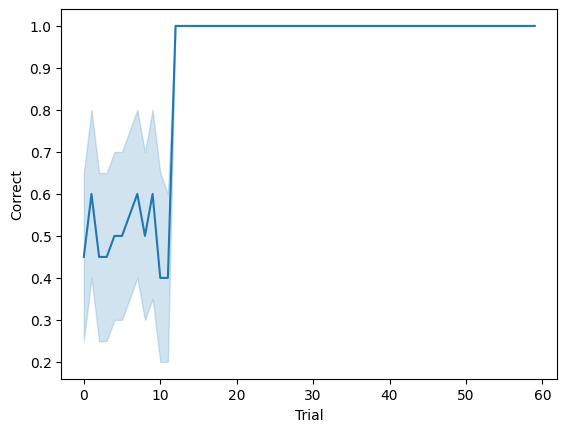

In [9]:
from sklearn.metrics.pairwise import cosine_similarity

columns = ["Trial", "Correct"]
df = pd.DataFrame([], columns=columns)

phish_indices = np.array(range(1,186))
ham_indicies = np.array(range(187,239))

# Teacher doesn't get reset between students
teacher = Agent(name="Teacher", attributes=['emailId',
                                              'sender_mismatch',
                                              'request_credentials',
                                              'subject_suspecious',
                                              'urgent',
                                              'offer',
                                              'link_mismatch'],
                default_utility=0.5, mismatch_penalty=1)

for agentID in range(20):
  seen_emails = []
  student = Agent(name="Student", attributes=['judgement',
                                              'embedding'],
                default_utility=0.5, mismatch_penalty=100)

  student.similarity(["embedding"], lambda x, y: cosine_similarity([x,y])[0,1])

  trial_order = np.random.choice(["phishing", "ham"], 60, replace=True) # update
  for trial in range(60):
    emailType = trial_order[trial]
    choices = []

    if(emailType == 'ham'):
      indices = ham_indices
    else:
      indices = phish_indices

    for emailId in indices:
        email = emails[emails["EmailID"] == emailId]
        email_copy = copy.deepcopy(email)
        email_copy.drop(['Embedding', 'Body', 'Sender', 'Subject', 'Link', 'LinkText'], axis=1, inplace=True)
        email_copy['emailId'] = emailId
        choice = email_copy.to_dict(orient='records')[0]
        choices.append(choice)

    email_choice = teacher.choose(choices)
    emailId = email_choice['EmailID']

    email = emails[emails["EmailID"] == emailId]
    embedding = tuple(email['Embedding'].item())

    base_email = {'embedding':embedding}
    accept = copy.deepcopy(base_email)
    reject = copy.deepcopy(base_email)
    accept["judgement"] = "ham"
    reject["judgement"] = "phishing"

    agent_choice = student.choose([accept, reject])
    agent_judgement = agent_choice['judgement']

    correct = 0
    if(agent_judgement == email['Type'].values[0]): correct = 1

    if(trial > 10 and trial < 50):
      student.respond(correct)
      teacher.respond(correct)
    else:
      student.respond()
      teacher.respond()

    d = pd.DataFrame([[trial, correct]], columns=columns)
    df = pd.concat([d, df], ignore_index=True)

sns.lineplot(df, x='Trial', y='Correct')

<Axes: xlabel='AgentID', ylabel='Correct'>

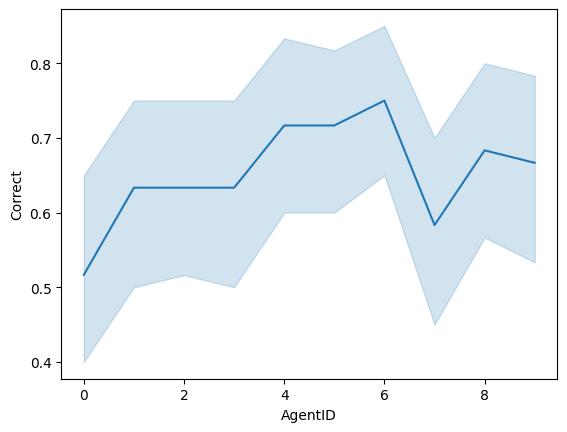

In [10]:
from sklearn.metrics.pairwise import cosine_similarity

mLink = 'https://github.com/TylerJamesMalloy/88308/blob/main/Data/emailEmbeddings.pkl?raw=true'
mfile = BytesIO(requests.get(mLink).content)
emails = pickle.load(mfile)

columns = ["AgentID", "Correct"]
df = pd.DataFrame([], columns=columns)

ham_indices = np.array(range(1,186))
phish_indices = np.array(range(187,239))

# Teacher doesn't get reset between students
teacher = Agent(name="Teacher", attributes=[  'emailId',
                                              'trial',
                                              'sender_mismatch',
                                              'request_credentials',
                                              'subject_suspecious',
                                              'urgent',
                                              'offer',
                                              'link_mismatch'],
                default_utility=0.5, mismatch_penalty=1)

for agentID in range(10):
  student = Agent(name="Student", attributes=['judgement',
                                              'embedding'],
                default_utility=0.5, mismatch_penalty=100)

  student.similarity(["embedding"], lambda x, y: cosine_similarity([x,y])[0,1])

  trial_order = np.random.choice(["phishing", "ham"], 60, replace=True) # update
  for trial in range(60):
    emailType = trial_order[trial]
    choices = []

    if(emailType == 'ham'):
      indices = ham_indices
    else:
      indices = phish_indices

    for emailId in indices:
        email = emails[emails["EmailID"] == emailId]
        email_copy = copy.deepcopy(email)
        email_copy.drop(['Embedding', 'Body', 'Sender', 'Subject', 'Link', 'LinkText'], axis=1, inplace=True)
        email_copy['emailId'] = emailId
        email_copy['trial'] = trial
        choice = email_copy.to_dict(orient='records')[0]
        choices.append(choice)

    email_choice = teacher.choose(choices)
    emailId = email_choice['EmailID']

    email = emails[emails["EmailID"] == emailId]
    embedding = tuple(email['Embedding'].item())

    base_email = {'embedding':embedding}
    accept = copy.deepcopy(base_email)
    reject = copy.deepcopy(base_email)
    accept["judgement"] = "ham"
    reject["judgement"] = "phishing"

    agent_choice = student.choose([accept, reject])
    agent_judgement = agent_choice['judgement']

    correct = 0
    if(agent_judgement == email['Type'].values[0]): correct = 1

    if(trial > 10 and trial < 50):
      student.respond(correct)
      teacher.respond(correct)
    else:
      student.respond()
      teacher.respond()

    d = pd.DataFrame([[agentID, correct]], columns=columns)
    df = pd.concat([d, df], ignore_index=True)

sns.lineplot(df, x='AgentID', y='Correct')

# Evaluating teachers with final 10 trial performance from students

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
/usr/local/lib/python3.10/dist-packages/numpy/core/fromn

<Axes: xlabel='AgentID', ylabel='Correct'>

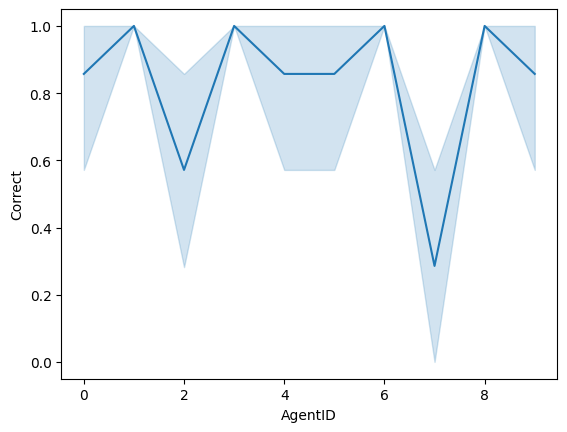

In [11]:
import warnings
warnings.simplefilter("ignore", UserWarning)
from sklearn.metrics.pairwise import cosine_similarity

mLink = 'https://github.com/TylerJamesMalloy/88308/blob/main/Data/emailEmbeddings.pkl?raw=true'
mfile = BytesIO(requests.get(mLink).content)
emails = pickle.load(mfile)

columns = ["AgentID", "Correct"]
df = pd.DataFrame([], columns=columns)

ham_indices = np.array(range(1,186))
phish_indices = np.array(range(187,239))

# Teacher doesn't get reset between students
teacher = Agent(name="Teacher", attributes=[  'emailId',
                                              'trial',
                                              'sender_mismatch',
                                              'request_credentials',
                                              'subject_suspecious',
                                              'urgent',
                                              'offer',
                                              'link_mismatch'],
                default_utility=0.5, mismatch_penalty=1)

for agentID in range(10):
  student = Agent(name="Student", attributes=['judgement',
                                              'embedding'],
                default_utility=0.5, mismatch_penalty=100)

  student.similarity(["embedding"], lambda x, y: cosine_similarity([x,y])[0,1])

  teacher_delayed_responses = []
  student_mean_correct_post = []

  trial_order = np.random.choice(["phishing", "ham"], 60, replace=True) # update
  for trial in range(60):
    emailType = trial_order[trial]
    choices = []

    if(emailType == 'ham'):
      indices = ham_indices
    else:
      indices = phish_indices

    for emailId in indices:
        email = emails[emails["EmailID"] == emailId]
        email_copy = copy.deepcopy(email)
        email_copy.drop(['Embedding', 'Body', 'Sender', 'Subject', 'Link', 'LinkText'], axis=1, inplace=True)
        email_copy['emailId'] = emailId
        email_copy['trial'] = trial
        choice = email_copy.to_dict(orient='records')[0]
        choices.append(choice)

    email_choice = teacher.choose(choices)
    emailId = email_choice['EmailID']

    email = emails[emails["EmailID"] == emailId]
    embedding = tuple(email['Embedding'].item())

    base_email = {'embedding':embedding}
    accept = copy.deepcopy(base_email)
    reject = copy.deepcopy(base_email)
    accept["judgement"] = "ham"
    reject["judgement"] = "phishing"

    agent_choice = student.choose([accept, reject])
    agent_judgement = agent_choice['judgement']

    correct = 0
    if(agent_judgement == email['Type'].values[0]): correct = 1

    if(trial < 10):
      student.respond()
      teacher.respond()
    elif(trial > 10 and trial < 50):
      student.respond(correct)
      teacher.respond(correct)
    elif(trial > 50 and trial < 58):
      student.respond()
      teacher_delayed_response = teacher.respond()
      teacher_delayed_responses.append(teacher_delayed_response)
      d = pd.DataFrame([[agentID, correct]], columns=columns)
      df = pd.concat([d, df], ignore_index=True)
      student_mean_correct_post.append(correct)
    else:
      student.respond()
      teacher_delayed_response = teacher.respond()
      teacher_delayed_responses.append(teacher_delayed_response)

      for response in teacher_delayed_responses:
        response.update(np.mean(student_mean_correct_post))

sns.lineplot(df, x='AgentID', y='Correct')